# Exercises: Exploring A Dataset

A critical first step to tackling any data analysis problem is to familiarize ourselves with the the data that we are using.
It is all too common for tutorials in the world of "data science" to eagerly leap right into slick methods of analysis without spending even a moment to get a feel for the data being processed.
This can quickly betray the trusting reader, who may then apply the tutorial's methods to data that is not immediately amenable to the same means of analysis.
Here are some simple questions that we should ask about any data set:

- What is the format of our data?
   - What is the domain of values associated with your dataset? For example, if you are working with images whose pixels are stored as uint8 values (i.e. unsigned 8-bit integers), then each pixel will reside on the integer-valued domain $[0, 255]$ (a total of $2^8$ values).
   - What is the "dimensionality" of our data? That is, how many numbers or quantities are associated with each datum in your dataset?
   - Is all of our data saved in the same format?
   - Is this a "lossy" format? (E.g. is there a substantial amount noise introduced to our data due to things like compression?)

- How was our data collected?
   - What are the scales/units associated with our data?
   - Was all of the data collected under comparable circumstances?
   - What are the biases in/limitations to the data? (E.g. pictures of people scraped off of social media could be biased towards selfie-style pictures, where the faces are well-lit and are prominently framed with little clutter; there could also be prominent biases in the distributions of ages and ethnicities of people depicted in such data)
   - Are there measurement errors (either documented or apparent) associated with the data?
   
- What are the "statistics" of our data?
   - What are the minimum/maximum values of the various quantities in our data?
   - Can we visualize relationships between values in our data as a scatter or surface plot?
   - Can we visualize distributions of our data via things like histograms and [empirical cumulative distributions](https://en.wikipedia.org/wiki/Empirical_distribution_function)?

## Our Dataset: NBA Player Measurements
This notebook will step us through the process of exploring a simple dataset containing various measurements (e.g. height, weight, etc.) of NBA players who were part of the 2019 draft.
The data is saved using the [NetCDF-4 format](https://en.wikipedia.org/wiki/NetCDF), which is designed for storing scientific array data.
This data format does not affect our measurements in any important way - the values stored in the `nba_draft_measurements.nc` file reflect exactly the measurements that were collected.
As we will see, all of the length measurements in this dataset carry units of inches.
Furthermore, they were collected to the nearest quarter of an inch - this is a systematic source of error associated with the limited precision of the measurements that were made.

### Using the Xarray Library

We will load our data from the NetCDF-4 format using the powerful [xarray library](http://xarray.pydata.org/en/stable/index.html).
This is a Python package that allows one to work with multi-dimensional array data that has *labeled axes, units, and coordinates associated with it*.
Where bare NumPy arrays require us to relate crucial information about data, like measurement units and coordinates, via auxiliary documentation, xarray's data structures makes this information explicit and intimately associated with the array data.
Thus it enables us to process and manipulate our data while retaining critical context about each datum.

Once we have access to this data, our main goal will be to use the [matplotlib library](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/Matplotlib.html) to visualize our data, and to glean interesting patterns from these visualizations.

Let's start by loading our data into an [xarray-Dataset](http://xarray.pydata.org/en/stable/data-structures.html#dataset)

In [1]:
# run this cell
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np

from pathlib import Path
import xarray as xr

# Here we use the xarray library to load the NetCDF-4 file into an xarray-Dataset
draft_data = xr.load_dataset(Path.cwd() / "data" / "nba_draft_measurements.nc")

Running the following cell will display the "repr" (representation) of this object.
Where most Python objects display strings as their reprs, a xarray object's repr is especially informative.
In a Jupyter notebook in should produce an interactive summary of its data, rendered via HTML elements.

Take some time to study the output of this cell.
What are the data variables (i.e. measurements) in this dataset?
What are the coordinates (i.e. identifiers) associated with these measured values? 

In [2]:
# Viewing the so-called "repr" of our dataset
draft_data

<xarray.Dataset>
Dimensions:            (names: 70)
Coordinates:
  * names              (names) object 'Nickeil Alexander-Walker' ... 'Dylan W...
Data variables:
    position           (names) object 'SG' 'C' 'PF' 'C' ... 'PG' 'SF' 'PF' 'SF'
    height_no_shoes    (names) float64 76.25 80.75 79.75 ... 78.25 77.75 78.25
    height_with_shoes  (names) float64 77.5 82.0 81.0 86.5 ... 79.75 79.5 79.5
    weight             (names) float64 203.8 239.0 208.4 ... 208.8 240.2 195.8
    wingspan           (names) float64 81.5 87.5 84.0 91.0 ... 82.75 81.75 82.0
    standing_reach     (names) float64 102.0 109.5 107.0 ... 103.0 104.5 104.5
    body_fat_prcnt     (names) float64 5.9 8.5 3.6 7.1 5.0 ... 4.3 4.9 5.4 4.6
    hand_length        (names) float64 8.5 9.25 9.0 9.25 ... 7.75 8.5 9.0 8.25
    hand_width         (names) float64 8.75 9.5 9.75 9.5 ... 9.0 9.5 10.5 9.5
Attributes:
    length-units:  inches
    weight-units:  pounds
    readme:        \nDescribes various measurements of athletes who participa...
    url:           https://www.nbadraft.net/2019-nba-draft-combine-measurements/

This data is an `xarray.Dataset` that stores measurements/info for 70 players from the 2019 NBA draft; these measurements are:

1. Height (no shoes) [inches]
2. Height (with shoes) [inches]
3. Weight [pounds]
4. Standing Reach [inches]
5. Wingspan [inches]
6. Body-fat Percentage
7. Hand-length [inches]
8. Hand-width [inches]
9. Player Position [PG: point guard, SG: shooting guard, C: center, PF: power-forward, SF: small forward]

Each of these measurements corresponds to a so-called **data variable** in the xarray-dataset; each of which is a shape-(70,) array.
Each entry across data variables corresponds to a specific player; thus the so-called **coordinates** that align these data are a shape-(70,) array of player names.

### Accessing the data

Each data variable can be accessed by metric name (you can use tab-completion to check the different metric names).
Evaluate `draft_data.height_no_shoes` in the cell below to access `shape-(70,)` array of player heights; note that the player names are still associated with these measurements.
This is an array-like object, thus it can be indexed into and sliced like a standard numpy array.

In [3]:
# accessing a data variable from our dataset
# STUDENT CODE HERE
draft_data.height_no_shoes

<xarray.DataArray 'height_no_shoes' (names: 70)>
array([76.25, 80.75, 79.75, 84.75, 73.5 , 78.25, 73.  , 77.75, 79.  ,
       85.25, 79.25, 82.  , 79.25, 77.25, 75.  , 74.75, 72.  , 70.75,
       89.25, 80.75, 81.25, 76.  , 72.75, 73.5 , 69.75, 82.25, 81.  ,
       76.5 , 79.25, 74.5 , 76.  , 76.25, 76.75, 79.  , 80.75, 78.75,
       76.5 , 79.  , 74.5 , 76.5 , 76.75, 76.75, 77.  , 80.25, 76.5 ,
       75.25, 77.75, 79.25, 76.25, 78.  , 80.  , 71.5 , 75.5 , 81.75,
       76.  , 82.75, 78.5 , 80.75, 79.25, 81.5 , 76.  , 76.5 , 80.5 ,
       78.5 , 69.5 , 75.  , 75.5 , 78.25, 77.75, 78.25])
Coordinates:
  * names    (names) object 'Nickeil Alexander-Walker' ... 'Dylan Windler'

The underlying numpy array associated with a data variable can be accessed via the `.data` attribute.
Evaluate `draft_data.height_no_shoes.data` in the cell below to access the NumPy array that stores its data.

In [4]:
# accessing the underlying numpy array of a data variable
# STUDENT CODE HERE
draft_data.height_no_shoes.data

array([76.25, 80.75, 79.75, 84.75, 73.5 , 78.25, 73.  , 77.75, 79.  ,
       85.25, 79.25, 82.  , 79.25, 77.25, 75.  , 74.75, 72.  , 70.75,
       89.25, 80.75, 81.25, 76.  , 72.75, 73.5 , 69.75, 82.25, 81.  ,
       76.5 , 79.25, 74.5 , 76.  , 76.25, 76.75, 79.  , 80.75, 78.75,
       76.5 , 79.  , 74.5 , 76.5 , 76.75, 76.75, 77.  , 80.25, 76.5 ,
       75.25, 77.75, 79.25, 76.25, 78.  , 80.  , 71.5 , 75.5 , 81.75,
       76.  , 82.75, 78.5 , 80.75, 79.25, 81.5 , 76.  , 76.5 , 80.5 ,
       78.5 , 69.5 , 75.  , 75.5 , 78.25, 77.75, 78.25])

Data arrays support the same sort of elementwise (i.e. vectorized) operations as numpy arrays.
In the following cell, compute the height added to each player by his shoes.

In [5]:
# Computing the height added to each player by his shoes
# STUDENT CODE HERE
shoe_height = draft_data.height_with_shoes - draft_data.height_no_shoes

Data arrays also have available to them the same sort of math methods, like `.sum()`.
Use `.mean()` and `.std()` to compute the average height added to a player by his shoes, along with the standard deviation.
What units are these values?

In [6]:
# Computing the mean and standard deviation of the height added to each player by his shoes
# STUDENT CODE HERE
shoe_height.mean()
shoe_height.std()

<xarray.DataArray ()>
array(0.27608783)

### Visualizing Our Dataset

The `xarray` library has [rich and convenient plotting utilities](http://xarray.pydata.org/en/stable/plotting.html).

For example, the following code will plot how a player's height and weight varies across player-position.
Do you notice any similarities or differences between the trends in these two plots?

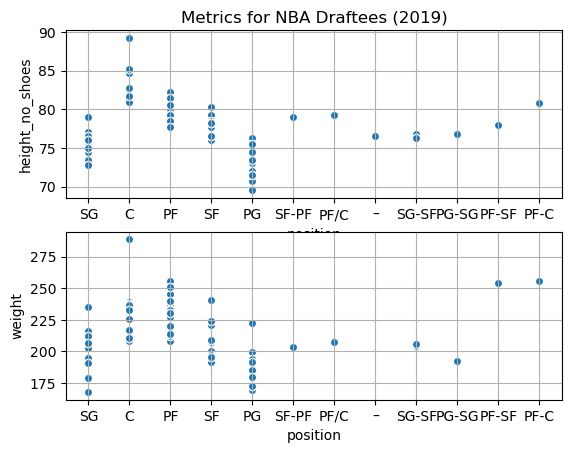

In [7]:
fig, axes = plt.subplots(nrows=2)
draft_data.plot.scatter(x="position", y="height_no_shoes", ax=axes[0])
draft_data.plot.scatter(x="position", y="weight", ax=axes[1])
axes[0].set_title("Metrics for NBA Draftees (2019)")
[ax.grid() for ax in axes];

The following plot shows display hand-width vs hand-height.

Do you notice anything about how the data falls along distinct vertical and horizontal lines in the plot?
What conclusion might you draw about the data-acquisition process to explain this "quantization" effect?

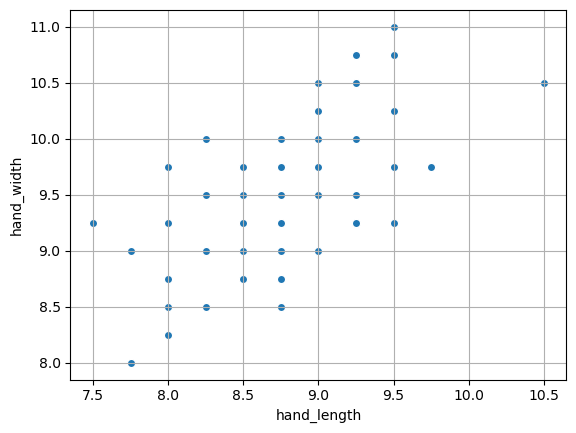

In [8]:
fig, ax = plt.subplots()
draft_data.plot.scatter(x="hand_length", y="hand_width")
ax.grid()

Provide a guess as to why the data points seem to "snap to" an evenly spaced grid in the plot.

*SOLUTION HERE*

Plot the same sort of scatter plot, but for wingspan vs height (without shoes)

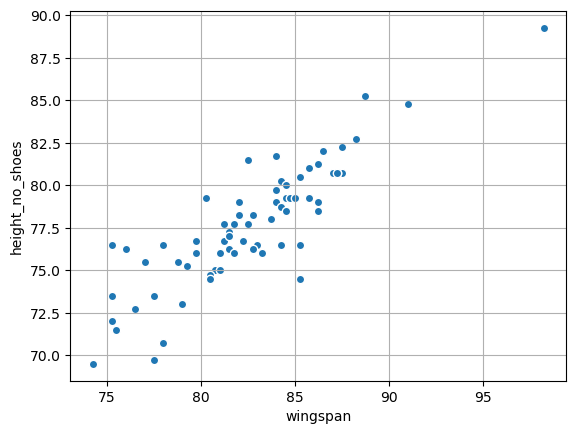

In [9]:
# STUDENT CODE HERE
fig, ax = plt.subplots()
draft_data.plot.scatter(x="wingspan", y="height_no_shoes")
ax.grid()

As detailed in ["Ordinary Least Squares in Python"](https://rsokl.github.io/CogWeb/Video/Linear_Regression.html#Linear-Least-Squares:-A-Closed-Form-Solution), the following equations indicate the exact slope and y-intercept of the line that best fits a dataset consisting of the $N$ ordered pairs $(x_n, y_n)_{n=1}^N$.

\begin{align}
m^* &=\frac{\sum_{n=0}^{N-1}x_ny_n-\frac{1}{N}\sum_{n=0}^{N-1}{y_n}\sum_{n=0}^{N-1}{x_n}}{\sum_{n=0}^{N-1}x_n^2-\frac{1}{N}\big(\sum_{n=0}^{N-1}x_n\big)^2}, \\
b^* &=\frac{1}{N}\sum_{n=0}^{N-1}{y_n}-m^*\frac{1}{N}\sum_{n=0}^{N-1}{x_n}
\end{align}


The values $m^*$ and $b^*$ are known as the "ordinary least squares parameter estimates" for this data.
They are the slope and y-intercept of the line that best fits the data $(x_n, y_n)_{n=1}^N$.

Notice that, if we think of our sequences of data $(x_n)_{n=0}^{N-1}$, and $(y_n)_{n=0}^{N-1}$ as two vectors – $\vec{x} = [x_0, x_1, ...]$ and  $\vec{y} = [y_0, y_1, ...]$ – then  $\sum_{n=0}^{N-1}{x_n y_n}$  can be seen as their dot-product: $\vec{x} \cdot \vec{y} = \sum_{n=0}^{N-1}{x_n y_n}$.

Given two shape-`(N,)` numpy arrays `x` and `y`, we can compute their dot-produce as:

```python
>>> import numpy as np
>>> x = np.array([4.0, 2.0, -8.0])
>>> y = np.array([0.0, 1.0, -2.0])
>>> np.matmul(x, y)
18.0

>>> x @ y  # just a fancy way to call np.matmul
18.0
```

- $\sum_{n=0}^{N-1}{x_n}$ represents a sum over all values in $(x_n)_{n=0}^{N-1}$. (`np.sum` is handy here!)
- $\sum_{n=0}^{N-1}x_n^2$ represents a sum over all **squared** values $(x^2_n)_{n=0}^{N-1}$
- $\big(\sum_{n=0}^{N-1}x_n\big)^2$ represents the square of the sum over $(x_n)_{n=0}^{N-1}$

Read the docstring `ordinary_least_squares` and complete the body of this function.

In [10]:
import numpy as np

def ordinary_least_squares(x, y):
    """
    Computes the slope and y-intercept for the line that minimizes
    the sum of squared residuals of mx + b and y, for the observed data
    (x, y).
    
    Parameters
    ----------
    x : numpy.ndarray, shape-(N,)
        The independent data. At least two distinct pieces of data 
        are required.

    y : numpy.ndarray, shape-(N,)
        The dependent data in correspondence with ``x``.

    Returns
    -------
    (m, b) : Tuple[float, float]
        The optimal values for the slope and y-intercept
    """
    # STUDENT CODE HERE
    m = (x @ y - np.sum(x)*np.sum(y)/len(x))/(x @ x - np.sum(x)*np.sum(x)/len(x))
    b = (np.sum(y) - np.sum(x)*m)/len(x)
    return (m, b)

Use the function `ordinary_least_squares` to compute the ideal slope and y-intercept for the line of least squares associated with the wingspan versus height (without shoes) data.

We will plot the wingspan vs height data along with the line of best fit on top of it

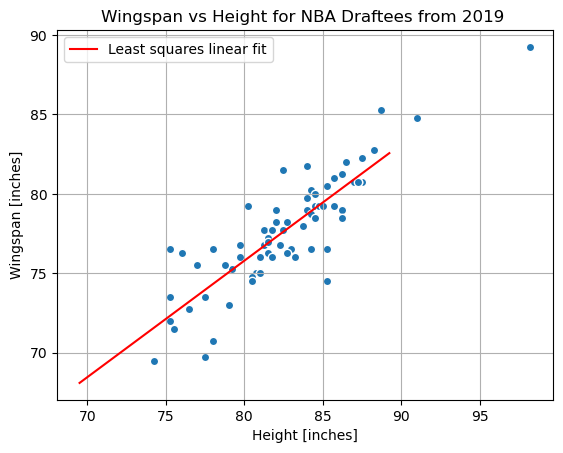

In [13]:
fig, ax = plt.subplots()

# plot the data using a scatter plot
# STUDENT CODE HERE

# compute the slope (m) and y-intercept (b) of
# the best-fit line
wingspan = draft_data.wingspan.data # get the wingspan data as a numpy array from `draft_data`
height = draft_data.height_no_shoes.data # get the height (no shoes) data as a numpy array from `draft_data`
m, b = ordinary_least_squares(wingspan, height) # compute m* and b* for the line that best fit (y) wingspan vs (x) height 

# create a domain of x-values between the minimum and maximum heights
# from the dataset (consider using `numpy.linspace`)

min_height = np.min(draft_data.height_no_shoes)# find the smallest height from the dataset
max_height = np.max(draft_data.height_no_shoes)# find the largest height from the dataset

x = np.linspace(min_height, max_height, 1000)
y = m*x+b # use m, b, and x to compute the y values of the line of best fit

# using m, b, and x to plot the best-fit line
ax.plot(x, y, c="red", label="Least squares linear fit")
draft_data.plot.scatter(x="wingspan", y="height_no_shoes")

ax.grid(True)
ax.set_xlabel("Height [inches]")
ax.set_ylabel("Wingspan [inches]")
ax.set_title("Wingspan vs Height for NBA Draftees from 2019 ")
ax.legend();